In [68]:
# <-- Import libraries, custom functions, and load configuration & datasets <-- #

import yaml
import datetime as dt
import re
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns

from statsmodels.multivariate.manova import MANOVA
from scipy import stats
from scipy.stats import pearsonr, boxcox, chi2_contingency, shapiro, probplot
from scipy.stats.contingency import association

# <-- Imports custom preprocessing functions from 'functions.py' <-- #

# from functions import ()

# <-- Loads YAML configuration to dynamically reference CSV output files. <-- #

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")


# df_demo = pd.read_csv(config['output_data']['file1'])
df_demo_variation = pd.read_csv(config['output_data']['file2'])
df_demo_test = pd.read_csv(config['output_data']['file3'])
df_demo_control = pd.read_csv(config['output_data']['file4'])

In [69]:
display(pd.DataFrame({
    "non_nulls": df_demo_variation.count(),
    "nulls": df_demo_variation.isnull().sum(),
    "total": len(df_demo_variation)
}))
print(df_demo_variation.dtypes)

,non_nulls,nulls,total
client_id,50487,0,50487
clnt_tenure_yr,50487,0,50487
clnt_tenure_mnth,50487,0,50487
clnt_age,50487,0,50487
gendr,50487,0,50487
num_accts,50487,0,50487
bal,50487,0,50487
calls_6_mnth,50487,0,50487
logons_6_mnth,50487,0,50487
Variation,50487,0,50487


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
gendr                 object
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
gendr_clean           object
tenure_quantile       object
dtype: object


In [70]:
display(pd.DataFrame({
    "non_nulls": df_demo_test.count(),
    "nulls": df_demo_test.isnull().sum(),
    "total": len(df_demo_test)
}))
print(df_demo_test.dtypes)

,non_nulls,nulls,total
client_id,26961,0,26961
clnt_tenure_yr,26961,0,26961
clnt_tenure_mnth,26961,0,26961
clnt_age,26961,0,26961
gendr,26961,0,26961
num_accts,26961,0,26961
bal,26961,0,26961
calls_6_mnth,26961,0,26961
logons_6_mnth,26961,0,26961
Variation,26961,0,26961


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
gendr                 object
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
gendr_clean           object
tenure_quantile       object
dtype: object


In [71]:
display(pd.DataFrame({
    "non_nulls": df_demo_control.count(),
    "nulls": df_demo_control.isnull().sum(),
    "total": len(df_demo_control)
}))
print(df_demo_control.dtypes)

,non_nulls,nulls,total
client_id,23526,0,23526
clnt_tenure_yr,23526,0,23526
clnt_tenure_mnth,23526,0,23526
clnt_age,23526,0,23526
gendr,23526,0,23526
num_accts,23526,0,23526
bal,23526,0,23526
calls_6_mnth,23526,0,23526
logons_6_mnth,23526,0,23526
Variation,23526,0,23526


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
gendr                 object
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
gendr_clean           object
tenure_quantile       object
dtype: object


To perform a **detailed Client Demographics Analysis**
To perform a detailed Client Demographics Analysis as outlined, I will follow a systematic EDA workflow for the three specified groups (**df_demo_variation, df_demo_test, and df_demo_control**). The analysis will cover univariate, bivariate, and multivariate techniques for each variable and compare the results across all groups to assess the fairness of the Test/Control split.

**1. Age Distribution:**
- The histogram and boxplot show the distribution and spot outliers/skewness.
- The Q-Q plot and normality test help check if the distribution is approximately normal.
- Binned age group barplots help compare group representation.

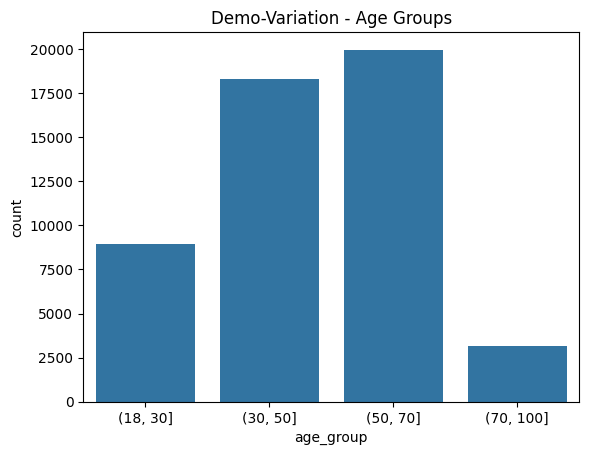

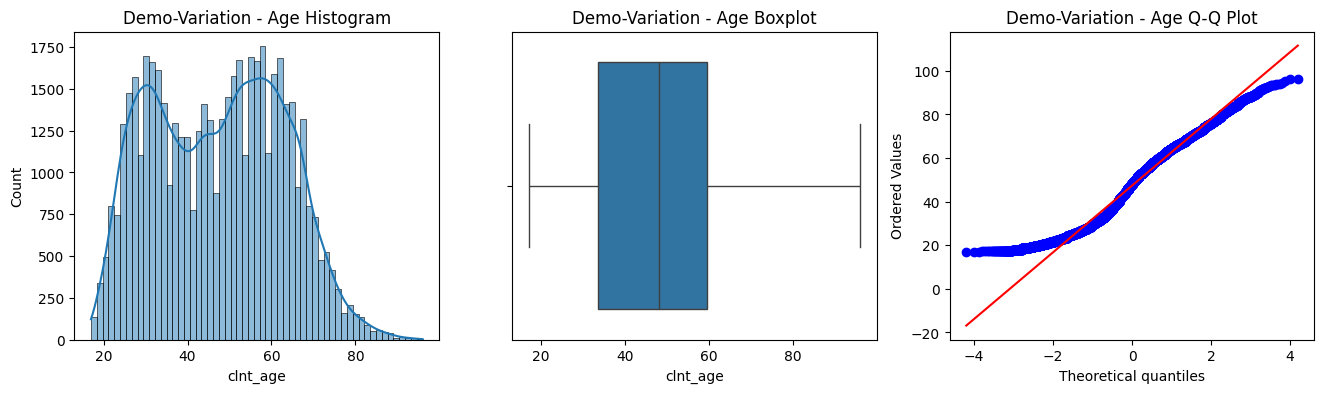

count    50487.000000
mean        47.319795
std         15.518616
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

d:\vscode101\vanguard_project\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50487.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for normality (Statistics: 0.9734)
Shapiro-Wilk test for normality (p-value: 0.0000)
Person Correlation: 0.3112)
Spearman Correlation: 0.3028)


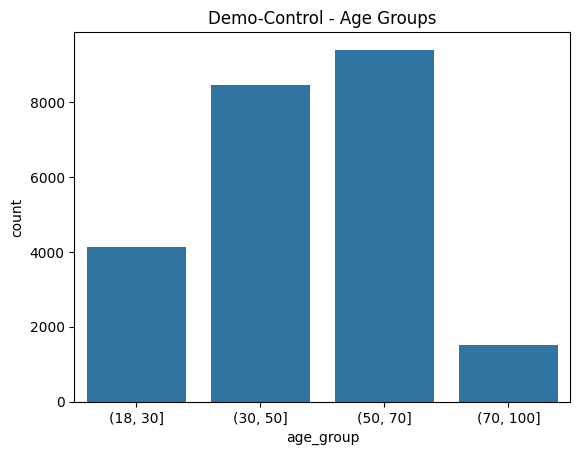

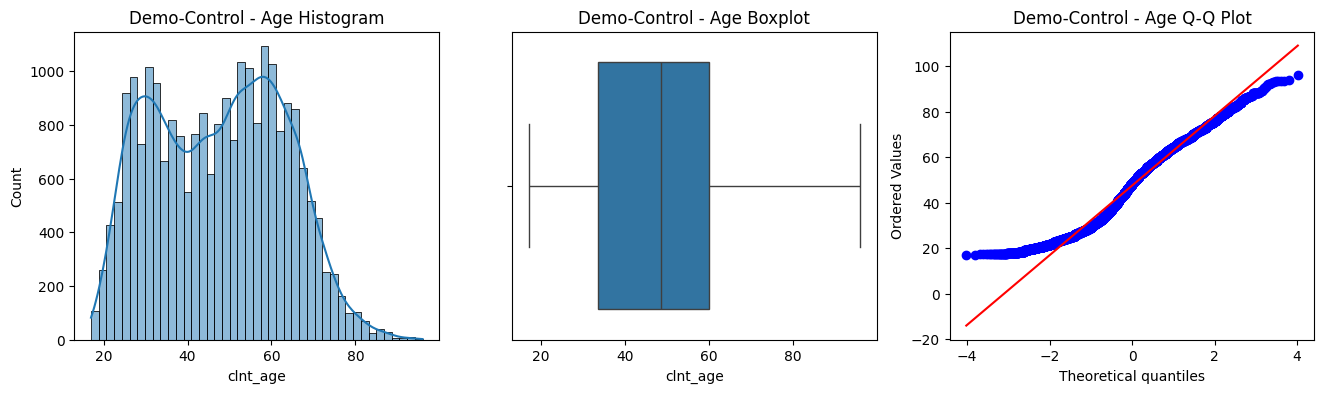

count    23526.000000
mean        47.498427
std         15.521781
min         17.000000
25%         33.500000
50%         48.500000
75%         60.000000
max         96.000000
Name: clnt_age, dtype: float64

d:\vscode101\vanguard_project\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23526.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for normality (Statistics: 0.9735)
Shapiro-Wilk test for normality (p-value: 0.0000)
Person Correlation: 0.3129)
Spearman Correlation: 0.3032)


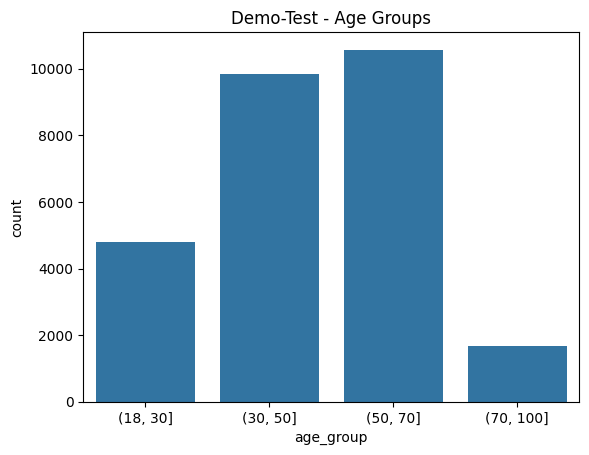

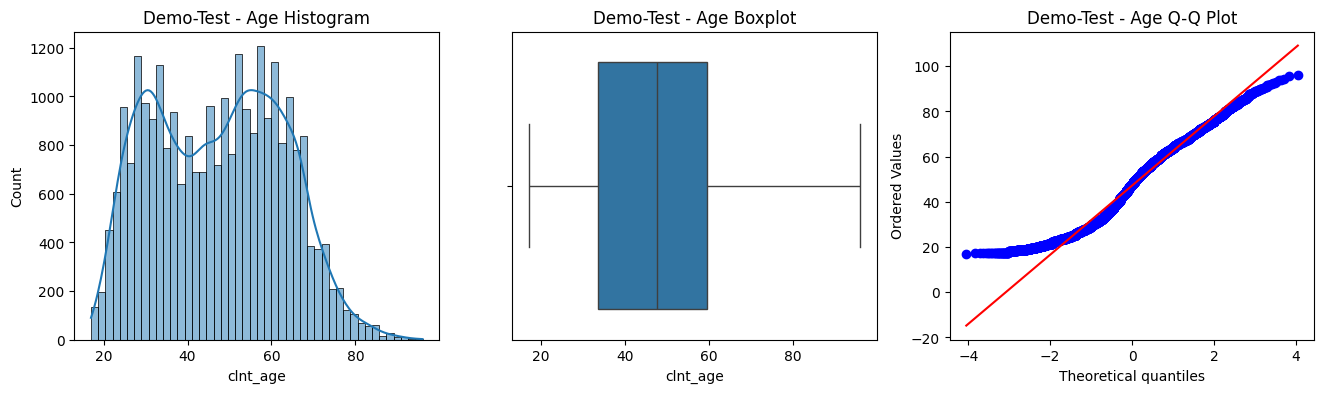

count    26961.000000
mean        47.163922
std         15.514461
min         17.000000
25%         33.500000
50%         47.500000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

Shapiro-Wilk test for normality (Statistics: 0.9732)
Shapiro-Wilk test for normality (p-value: 0.0000)
Person Correlation: 0.3096)
Spearman Correlation: 0.3023)


d:\vscode101\vanguard_project\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26961.
  res = hypotest_fun_out(*samples, **kwds)


In [72]:
def age_analysis(df, label):
    # Age groups
    age_bins = [18, 30, 50, 70, 100]
    df['age_group'] = pd.cut(df['clnt_age'], bins=age_bins)
    sns.countplot(x='age_group', data=df)
    plt.title(f'{label} - Age Groups')
    plt.show()
    #
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.histplot(df['clnt_age'].dropna(), kde=True)
    plt.title(f'{label} - Age Histogram')
    #
    plt.subplot(1,3,2)
    sns.boxplot(x=df['clnt_age'])
    plt.title(f'{label} - Age Boxplot')
    #
    plt.subplot(1,3,3)
    probplot(df['clnt_age'].dropna(), dist="norm", plot=plt)
    plt.title(f'{label} - Age Q-Q Plot')
    plt.show()
    #
    display(df['clnt_age'].describe())
    stat, p = shapiro(df['clnt_age'].dropna())
    print(f"Shapiro-Wilk test for normality (Statistics: {stat:.4f})")
    print(f"Shapiro-Wilk test for normality (p-value: {p:.4f})")
    #
    # Calculate the Pearson correlation 'Age' and 'Tenure year'
    person_correlation = df['clnt_age'].corr(df['clnt_tenure_yr'])
    print(f"Person Correlation: {person_correlation:.4f})")
    # Calculating the Spearman rank correlation 'Age' and 'Tenure'
    spearman_correlation = df['clnt_age'].corr(df['clnt_tenure_yr'], method='spearman')
    print(f"Spearman Correlation: {spearman_correlation:.4f})")
    
age_analysis(df_demo_variation, "Demo-Variation")
age_analysis(df_demo_control, "Demo-Control")
age_analysis(df_demo_test, "Demo-Test")

**2. Tenure Analysis:**
- These plots and stats show tenure’s distribution and its relationship with age.
- Correlation helps spot if one group has younger/older clients with longer/shorter tenure.

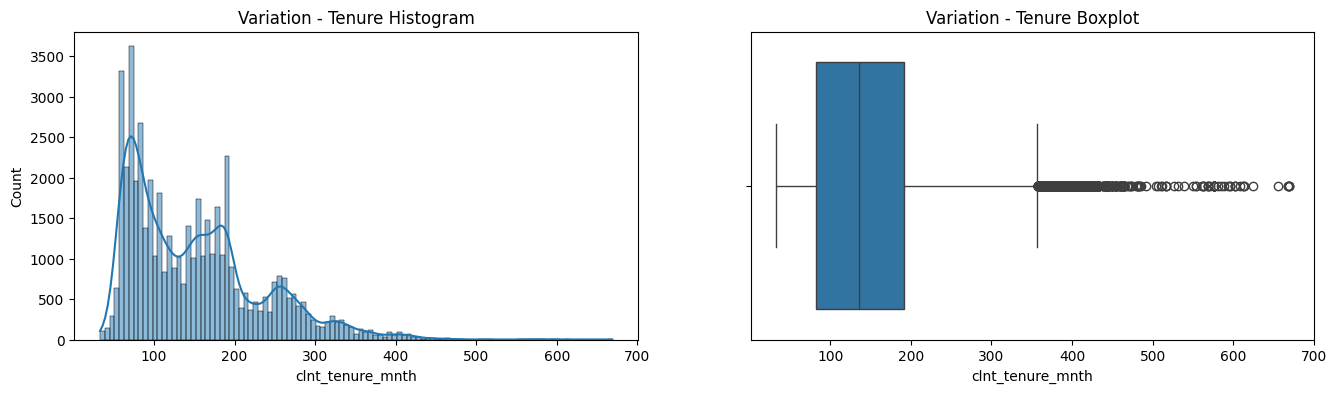

count    50487.000000
mean       150.416365
std         81.945403
min         33.000000
25%         82.000000
50%        136.000000
75%        192.000000
max        669.000000
Name: clnt_tenure_mnth, dtype: float64

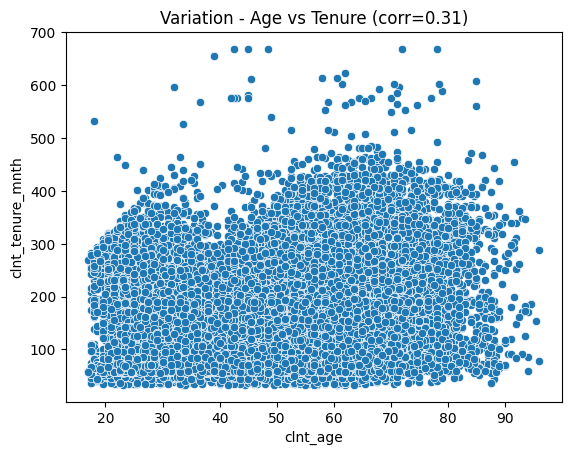

Pearson correlation between age and tenure_mnth: 0.31


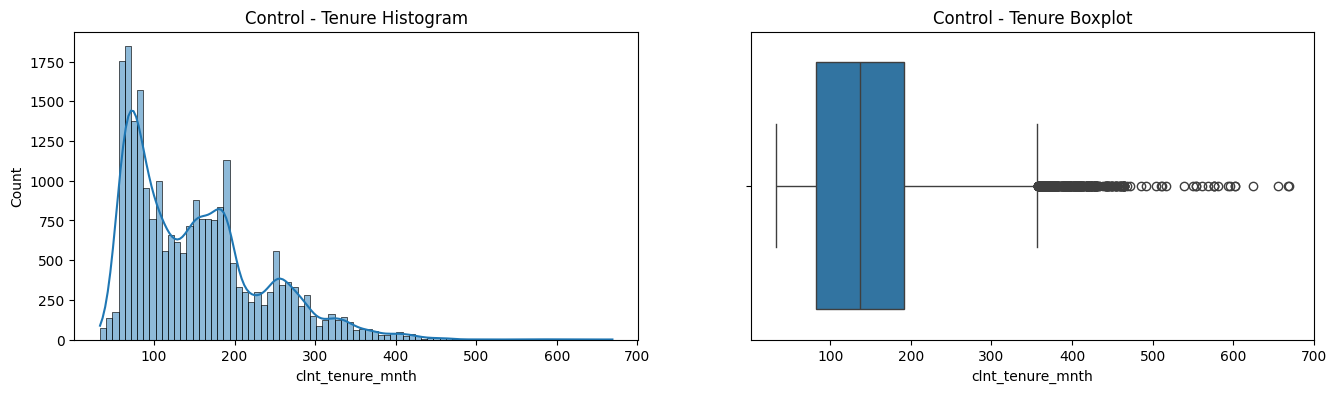

count    23526.000000
mean       151.062102
std         82.127663
min         33.000000
25%         82.000000
50%        137.000000
75%        192.000000
max        669.000000
Name: clnt_tenure_mnth, dtype: float64

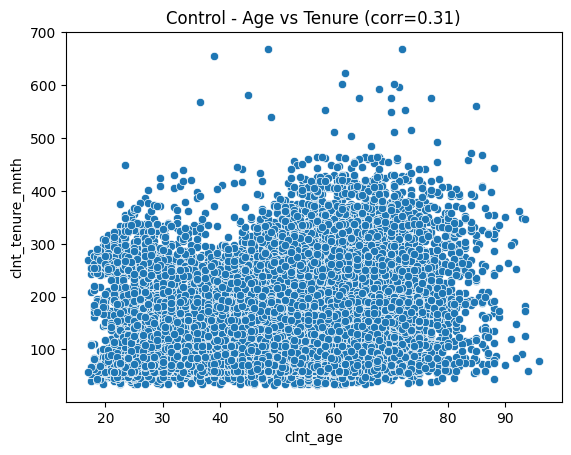

Pearson correlation between age and tenure_mnth: 0.31


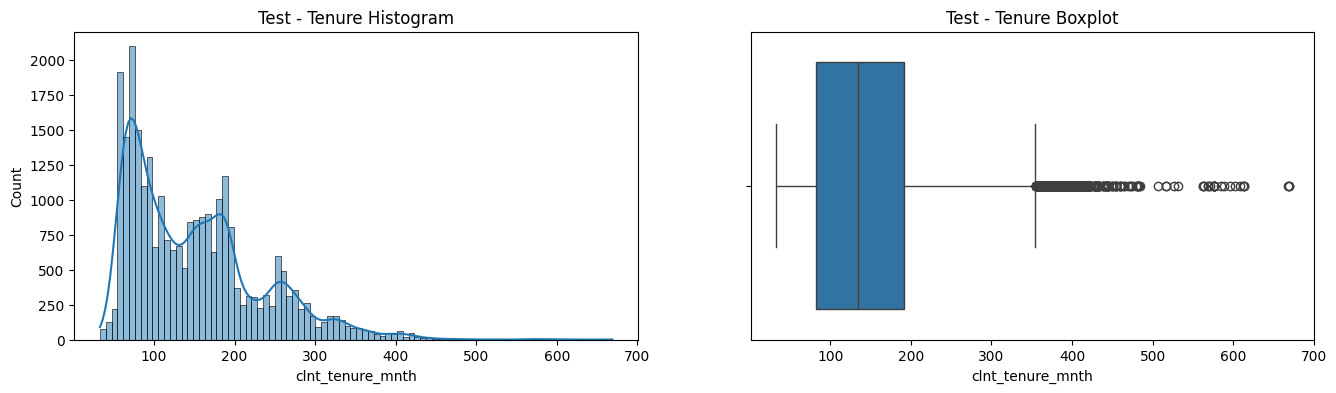

count    26961.000000
mean       149.852899
std         81.783390
min         33.000000
25%         82.000000
50%        134.000000
75%        191.000000
max        669.000000
Name: clnt_tenure_mnth, dtype: float64

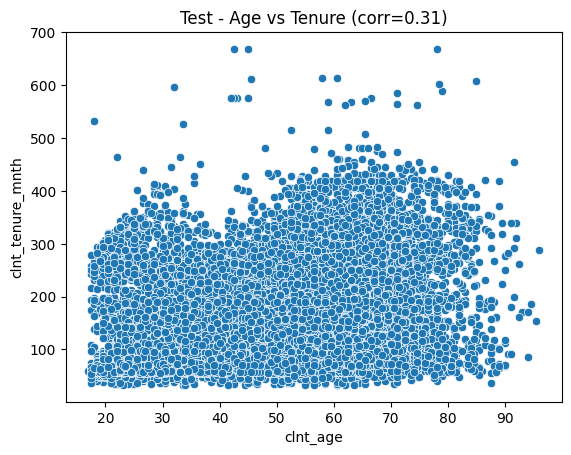

Pearson correlation between age and tenure_mnth: 0.31


In [73]:
def tenure_analysis(df, label):
    plt.figure(figsize=(16,4))
    #
    plt.subplot(1,2,1)
    sns.histplot(df['clnt_tenure_mnth'].dropna(), kde=True)
    plt.title(f'{label} - Tenure Histogram')
    #
    plt.subplot(1,2,2)
    sns.boxplot(x=df['clnt_tenure_mnth'])
    plt.title(f'{label} - Tenure Boxplot')
    plt.show()
    #
    display(df['clnt_tenure_mnth'].describe())
    # Correlation with age
    corr = df[['clnt_age','clnt_tenure_mnth']].corr().iloc[0,1]
    sns.scatterplot(x='clnt_age', y='clnt_tenure_mnth', data=df)
    plt.title(f'{label} - Age vs Tenure (corr={corr:.2f})')
    plt.show()
    print(f"Pearson correlation between age and tenure_mnth: {corr:.2f}")
    
tenure_analysis(df_demo_variation, "Variation")
tenure_analysis(df_demo_control, "Control")
tenure_analysis(df_demo_test, "Test")

**3. Other Variables:**
- Histogram and boxplot for each variable for central tendency, spread, and outliers.
- Correlation heatmap summarizes pairwise relationships.

In [74]:
df_demo_variation['bal'].describe()

count    5.048700e+04
mean     1.495168e+05
std      3.020390e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573433e+04
75%      1.399583e+05
max      1.632004e+07
Name: bal, dtype: float64

tenure_quantile,T1,T2,T3,T4
clnt_age_quantile,,,,
A1,5449,3574,1738,1124
A2,3079,3461,4278,1884
A3,2830,2961,3589,3355
A4,2434,2968,3383,4380


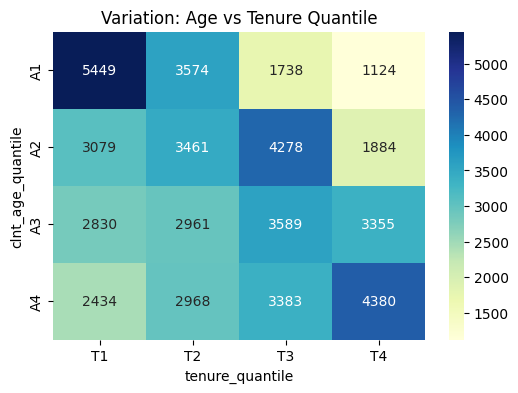

tenure_quantile,T1,T2,T3,T4
clnt_age_quantile,,,,
A1,2947,1922,964,596
A2,1668,1859,2289,998
A3,1490,1594,1892,1779
A4,1282,1609,1788,2284


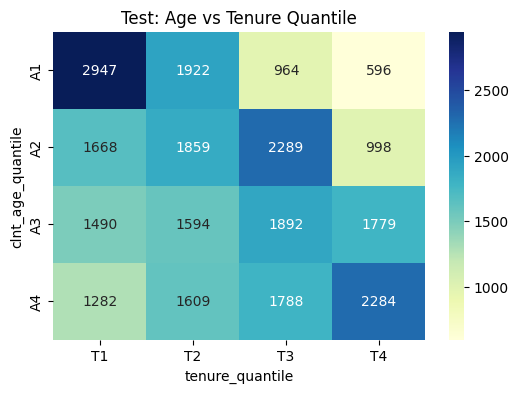

tenure_quantile,T1,T2,T3,T4
clnt_age_quantile,,,,
A1,2502,1652,774,528
A2,1411,1602,1989,886
A3,1340,1367,1697,1576
A4,1152,1359,1595,2096


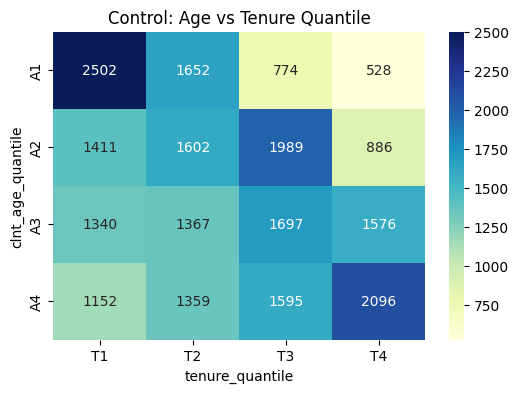

In [75]:
def plot_crosstab_heatmap(df, row, col, title):
    crosstab_result = pd.crosstab(df[row], df[col])
    display(crosstab_result)
    plt.figure(figsize=(6,4))
    sns.heatmap(crosstab_result, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{title} Age vs Tenure Quantile')
    plt.xlabel(col)
    plt.ylabel(row)
    plt.show()
    
plot_crosstab_heatmap(df_demo_variation, 'clnt_age_quantile', 'tenure_quantile', 'Variation:')
plot_crosstab_heatmap(df_demo_test, 'clnt_age_quantile', 'tenure_quantile', 'Test:')
plot_crosstab_heatmap(df_demo_control, 'clnt_age_quantile', 'tenure_quantile', 'Control:')

1. Age/Tenure Quantiles with Activity/Engagement Variables
- These show how digital and call activities vary by age or tenure group.

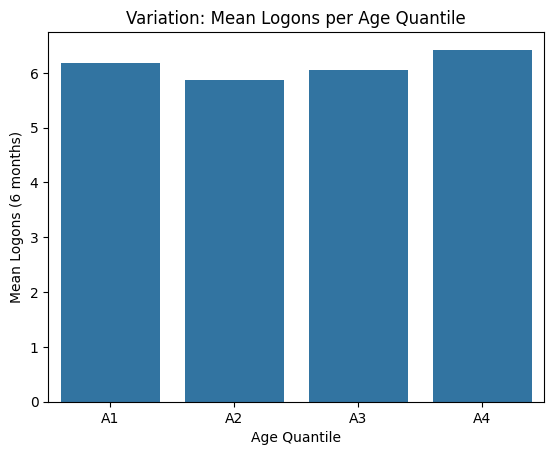

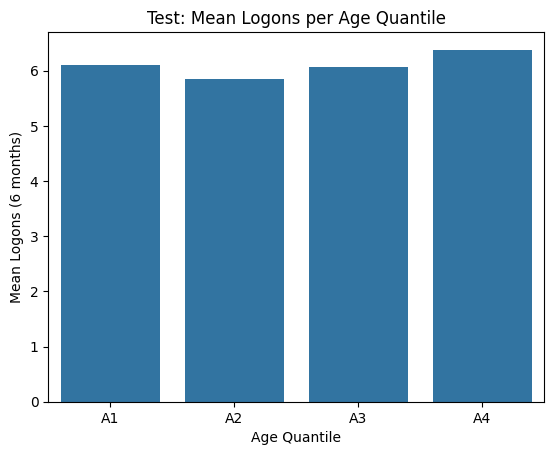

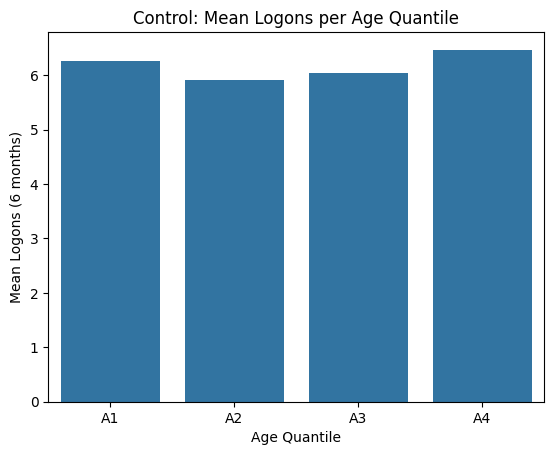

In [76]:
# A. Logons by Age Quantile
# Mean logons per age quantile (can also use median)
def plot_logons_age_quantile(df, cols, label):
    age_logons = df.groupby(cols[0])[cols[1]].mean().reset_index()
    sns.barplot(data=age_logons, x=cols[0], y=cols[1])
    plt.title(f'{label} Mean Logons per Age Quantile')
    plt.ylabel('Mean Logons (6 months)')
    plt.xlabel('Age Quantile')
    plt.show()

cols = ['clnt_age_quantile', 'logons_6_mnth']
plot_logons_age_quantile(df_demo_variation, cols, 'Variation:')
plot_logons_age_quantile(df_demo_test, cols, 'Test:')
plot_logons_age_quantile(df_demo_control, cols, 'Control:')

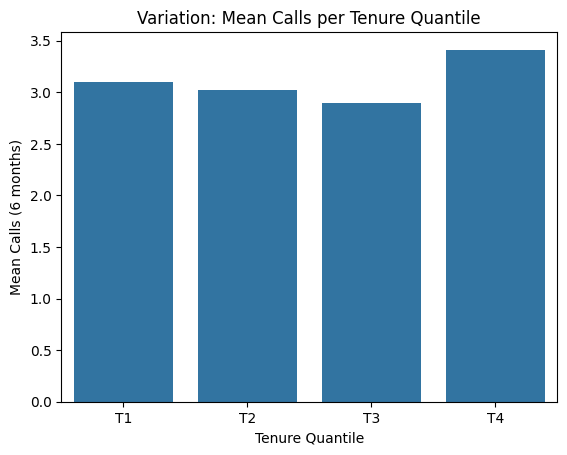

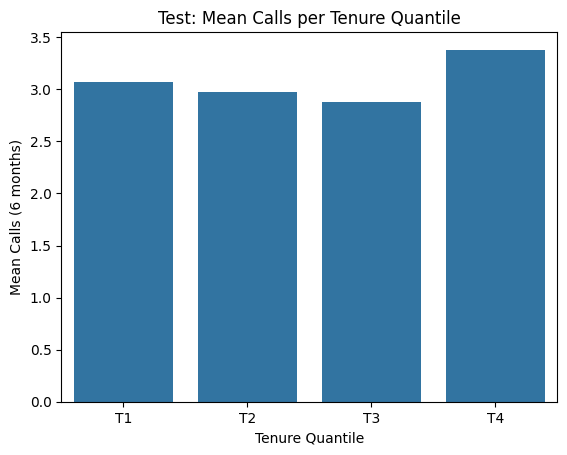

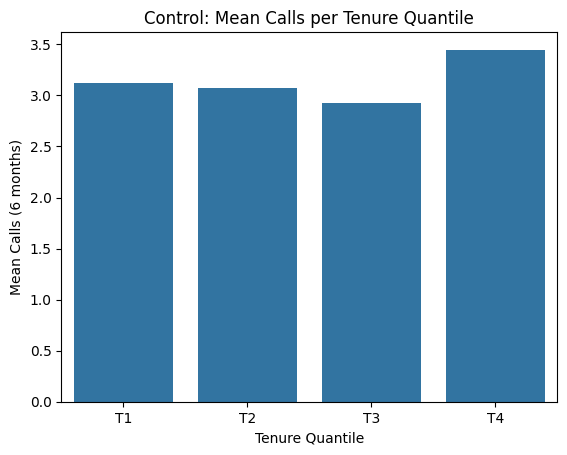

In [77]:
# B. Calls by Tenure Quantile
def plot_tenure_calls(df, cols, label):
    tenure_calls = df.groupby(cols[0])[cols[1]].mean().reset_index()
    sns.barplot(data=tenure_calls, x=cols[0], y=cols[1])
    plt.title(f'{label} Mean Calls per Tenure Quantile')
    plt.ylabel('Mean Calls (6 months)')
    plt.xlabel('Tenure Quantile')
    plt.show()

cols = ['tenure_quantile', 'calls_6_mnth']
plot_tenure_calls(df_demo_variation, cols, 'Variation:')
plot_tenure_calls(df_demo_test, cols, 'Test:')
plot_tenure_calls(df_demo_control, cols, 'Control:')

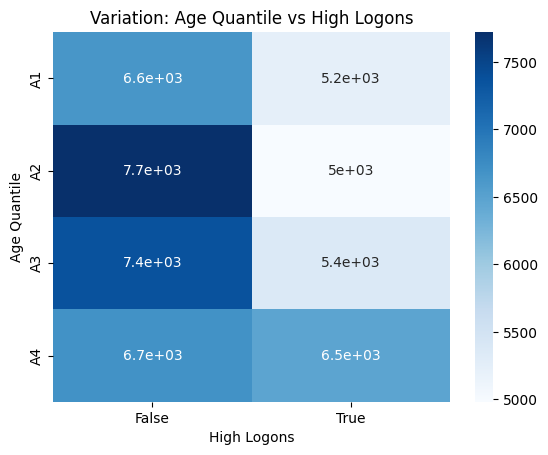

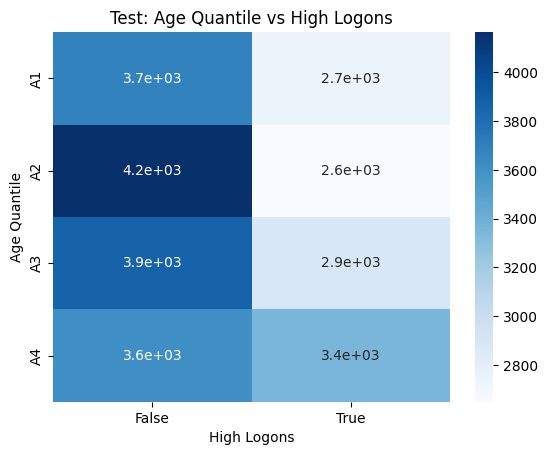

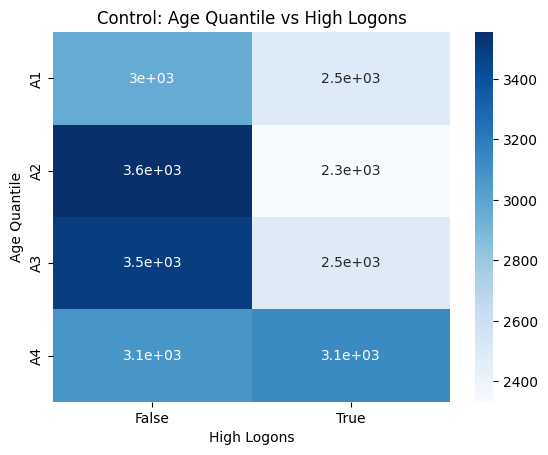

In [78]:
# C. Crosstab Heatmap: Age Quantile vs. High Engagement (e.g. Logons > median)
def plot_crosstab_heatmap(df, cols, label):
    df['logons_high'] = df[cols[1]] > df[cols[1]].median()
    crosstab_age_logons = pd.crosstab(df[cols[0]], df['logons_high'])
    sns.heatmap(crosstab_age_logons, annot=True, cmap='Blues')
    plt.title(f'{label} Age Quantile vs High Logons')
    plt.ylabel('Age Quantile')
    plt.xlabel('High Logons')
    plt.show()

cols = ['clnt_age_quantile', 'logons_6_mnth']
plot_crosstab_heatmap(df_demo_variation, cols, 'Variation:')
plot_crosstab_heatmap(df_demo_test, cols, 'Test:')
plot_crosstab_heatmap(df_demo_control, cols, 'Control:')

2. Balance with Activity
- These plots show if wealthier clients are more/less digitally engaged.

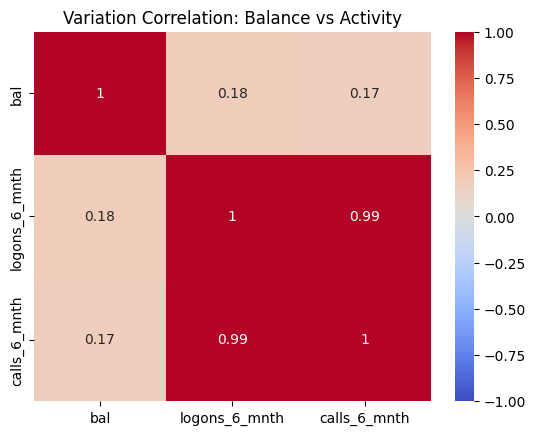

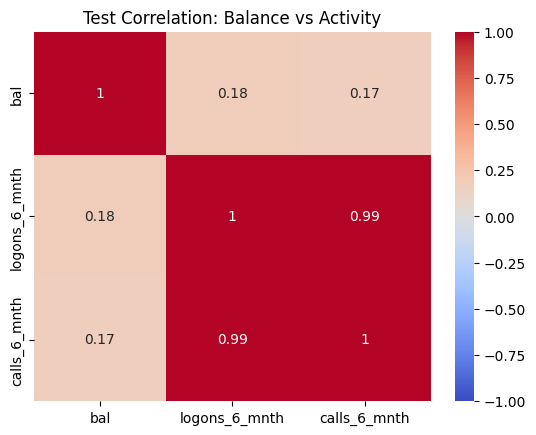

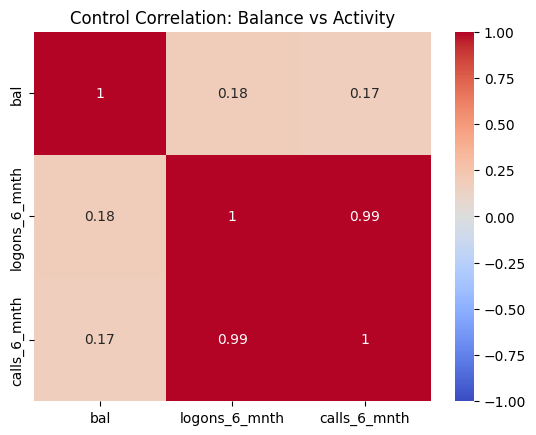

In [79]:
# A. Correlation and Heatmap: Balance vs. Logons/Calls
def plot_heatmap_bal_logoncall(df, label):
    corr_bal_activity = df[['bal', 'logons_6_mnth', 'calls_6_mnth']].corr()
    sns.heatmap(corr_bal_activity, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'{label} Correlation: Balance vs Activity')
    plt.show()
    
plot_heatmap_bal_logoncall(df_demo_variation, 'Variation')
plot_heatmap_bal_logoncall(df_demo_test, 'Test')
plot_heatmap_bal_logoncall(df_demo_control, 'Control')

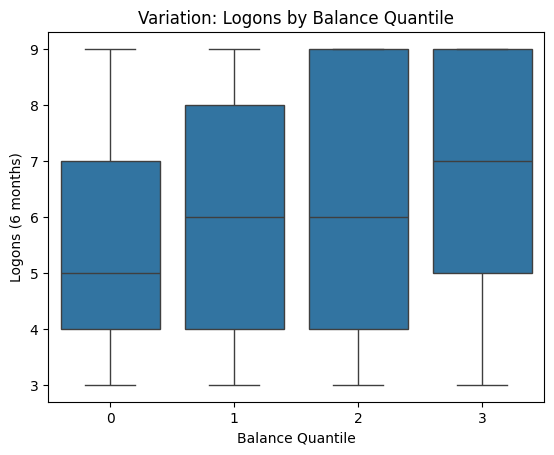

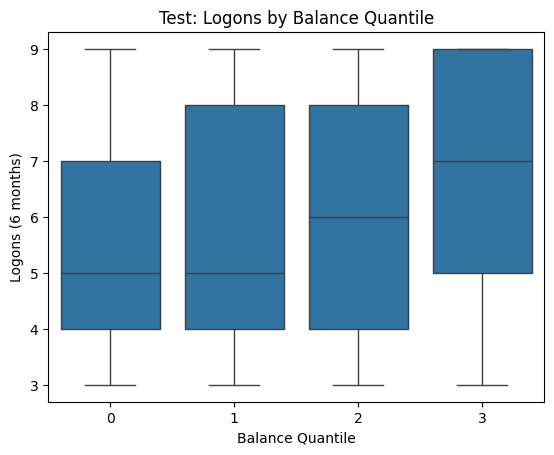

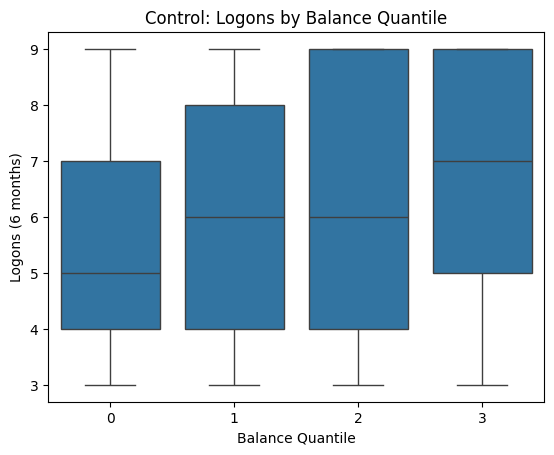

In [80]:
# B. Boxplot: Logons by Balance Quantile
def plot_logon_balquantile(df, label):
    df['bal_quantile'] = pd.qcut(df['bal'], 4, labels=False)
    sns.boxplot(x='bal_quantile', y='logons_6_mnth', data=df)
    plt.title(f'{label} Logons by Balance Quantile')
    plt.xlabel('Balance Quantile')
    plt.ylabel('Logons (6 months)')
    plt.show()

plot_logon_balquantile(df_demo_variation, 'Variation:')
plot_logon_balquantile(df_demo_test, 'Test:')
plot_logon_balquantile(df_demo_control, 'Control:')

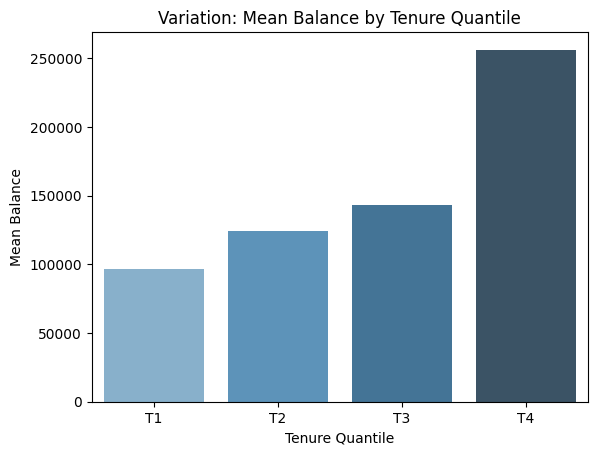

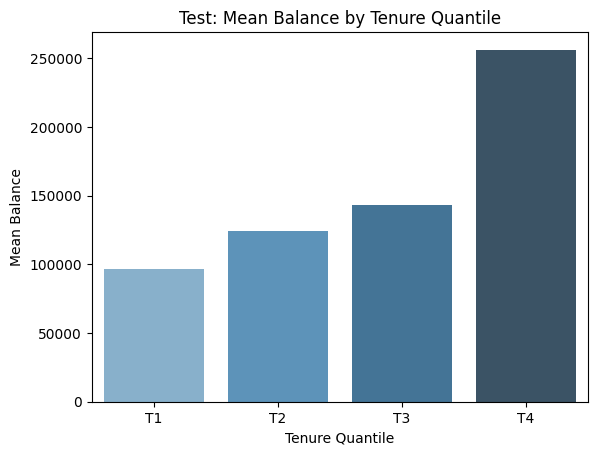

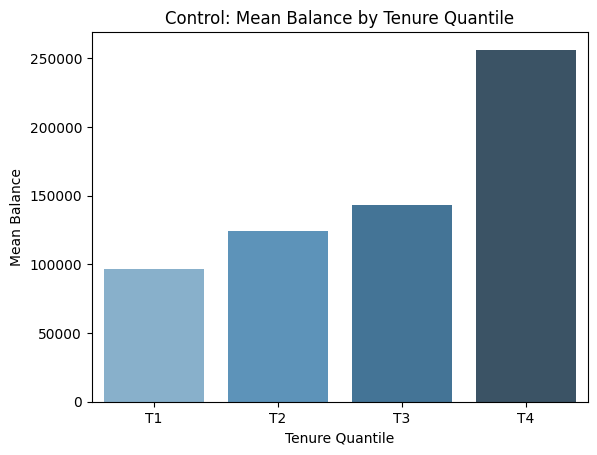

In [81]:
# Heatmap correlation between tenure_quantile and bal
# Calculate mean balance for each tenure_quantile
def plot_corr_ternure_bal_heatmap(df, label):
    pivot = df_demo_control.groupby('tenure_quantile')['bal'].mean().reset_index()

    # Plot heatmap (1D case will just be a barplot)
    sns.barplot(data=pivot, x='tenure_quantile', y='bal', hue='tenure_quantile', palette='Blues_d')
    plt.title(f'{label} Mean Balance by Tenure Quantile')
    plt.xlabel('Tenure Quantile')
    plt.ylabel('Mean Balance')
    plt.show()

plot_corr_ternure_bal_heatmap(df_demo_variation, 'Variation:')
plot_corr_ternure_bal_heatmap(df_demo_test, 'Test:')
plot_corr_ternure_bal_heatmap(df_demo_control, 'Control:')

In [82]:
df_demo_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_quantile,gendr_clean,tenure_quantile,age_group,logons_high,bal_quantile
0,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,A3,U,T2,"(50, 70]",True,2
1,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,A2,F,T3,"(30, 50]",False,2
2,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control,A1,U,T1,"(30, 50]",False,0
3,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control,A3,U,T1,"(50, 70]",False,0
4,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control,A4,M,T4,"(50, 70]",False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,Control,A2,F,T2,"(30, 50]",True,2
23522,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,Control,A3,F,T4,"(30, 50]",False,2
23523,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control,A3,F,T4,"(50, 70]",True,2
23524,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control,A4,M,T4,"(50, 70]",True,1


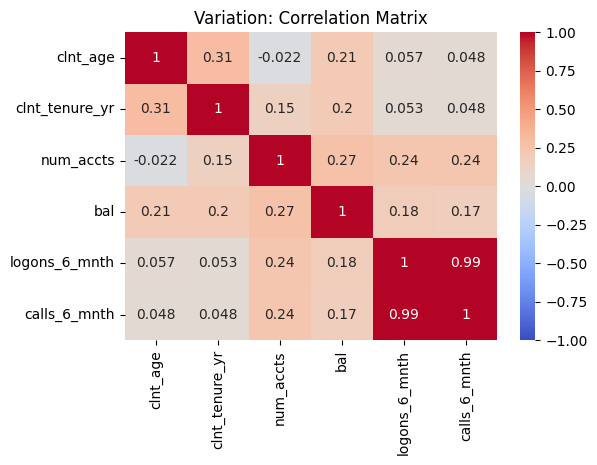

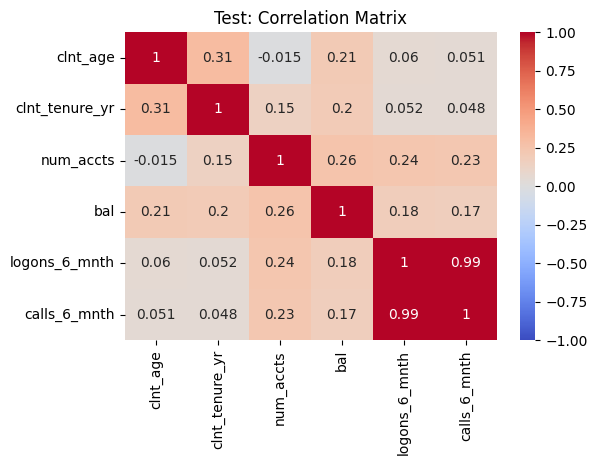

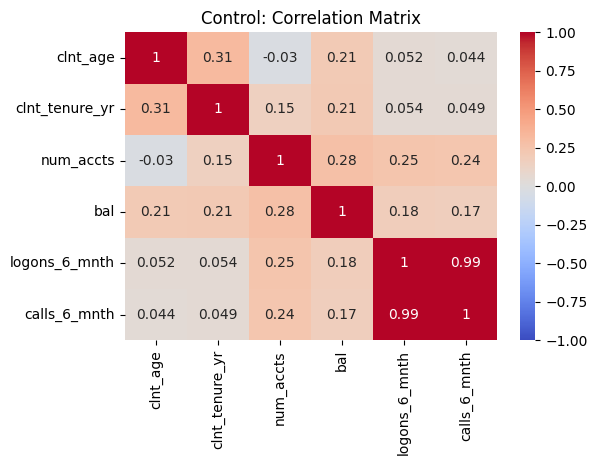

In [83]:
def plot_correlation_heatmap(df, cols, title):
    corr = df[cols].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()
    
cols = ['clnt_age', 'clnt_tenure_yr', 'num_accts', 'bal', 'logons_6_mnth', 'calls_6_mnth']
plot_correlation_heatmap(df_demo_variation, cols, 'Variation: Correlation Matrix')
plot_correlation_heatmap(df_demo_test, cols, 'Test: Correlation Matrix')
plot_correlation_heatmap(df_demo_control, cols, 'Control: Correlation Matrix')